In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import healpy as hp
from scipy.stats import binned_statistic
import rubin_sim.maf as maf
from rubin_sim.data import get_baseline
import time
import sys
import sqlite3
import json
import glob
from natsort import natsorted

In [2]:
# data_path = "/Users/jrobinson/rubin_templates/remove_no_template_results_32_noDD"
# savefig_path = "plot_template_coverage_figs"
# metric_fname = "first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_*_and_note_not_like_DD_HEAL.npz"

In [6]:
baseline = "first_year_baseline_v3_3_10yrs_db_noDD_noTwi"
filt = "r"
nside = 32
tscale = 168
data_path = "/Users/jrobinson/rubin_templates/remove_no_template_results_{}_{}".format(nside,baseline)
metric_fname = "{}_tscale-{}_nside-{}_doAllTemplateMetrics_Count_{}_and_night_lt_*_and_note_not_like_DD_HEAL.npz".format(
                    baseline,tscale,nside,filt)
savefig_path = "plot_template_coverage_figs"

metric_fname

'first_year_baseline_v3_3_10yrs_db_noDD_noTwi_tscale-168_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_*_and_note_not_like_DD_HEAL.npz'

In [7]:
metric_files = glob.glob("{}/{}".format(data_path,metric_fname))
metric_files = natsorted(metric_files)

In [8]:
metric_files

[]

In [32]:
mb = maf.MetricBundle.load(metric_files[0])

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


In [33]:
mb.__dict__

{'metric': <rubin_sim.maf.metrics.base_metric.BaseMetric at 0x170da5dc0>,
 'slicer': <rubin_sim.maf.slicers.healpix_slicer.HealpixSlicer at 0x1711afdc0>,
 'constraint': 'filter = "r" and night <= 28 and note not like "%DD%"',
 'stacker_list': [],
 'maps_list': None,
 'summary_metrics': [],
 'info_label': 'r and night < 28 and note not like %DD%',
 'run_name': 'first_year_baseline_v3.0_10yrs_tscale-28_nside-32',
 'file_root': 'first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_28_and_note_not_like_DD_HEAL',
 'db_cols': None,
 'plot_funcs': [<rubin_sim.maf.plots.spatial_plotters.HealpixSkyMap at 0x1711a3100>,
 'plot_dict': {},
 'display_dict': {'group': None,
  'subgroup': None,
  'order': 2,
  'caption': 'doAllTemplateMetrics calculated on a HealpixSlicer basis using a subset of data selected via filter = "r" and night <= 28 and note not like "%DD%".'},
 'metric_values': masked_array(data=[--, --, --, ..., --, --, --],
              mask=[ True, 

In [34]:
mb.file_root

'first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_28_and_note_not_like_DD_HEAL'

In [35]:
# retrieve data/mask for all the masked arrays
# each value in data corresponds to the metric value for some slice point
data = mb.metric_values.data
mask = mb.metric_values.mask
metric_vals = np.ma.array(data, mask=mask)
        
# replace the masked values with nan
metric_vals.fill_value = np.nan

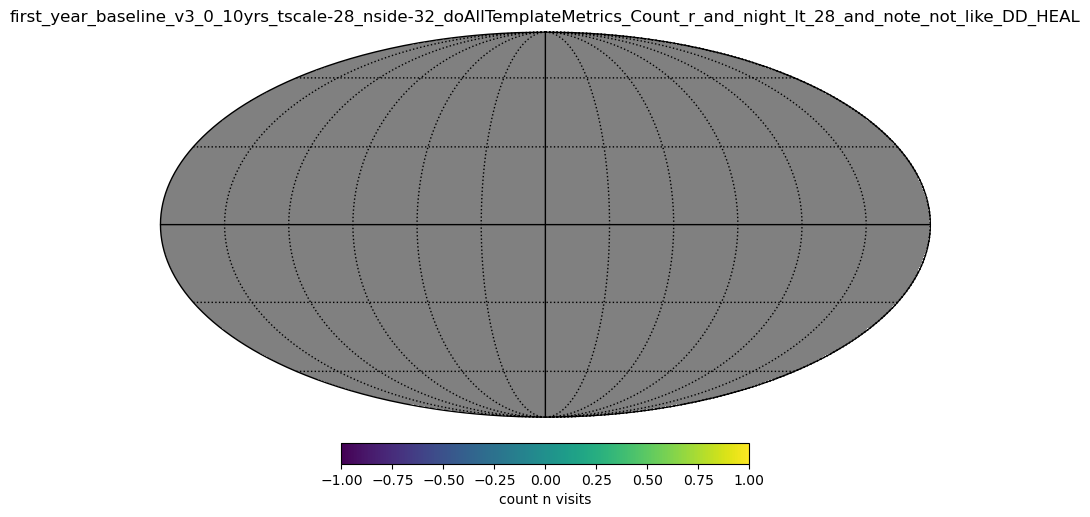

In [36]:
#plot the skymap
x = hp.mollview(metric_vals, title=mb.file_root, 
                cbar = None)
hp.graticule()

# customise the colorbar
fig = plt.gcf()
ax = plt.gca()
image = ax.get_images()[0]
cbar = fig.colorbar(image, ax=ax, orientation = "horizontal", shrink = 0.5, location = "bottom",
                   pad = 0.05)
cbar.set_label("count n visits")

#     fname = "{}.png".format("".join(title.split(" ")))
#     plt.savefig(fname, facecolor="w", transparent=True, bbox_inches="tight")

plt.show()

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


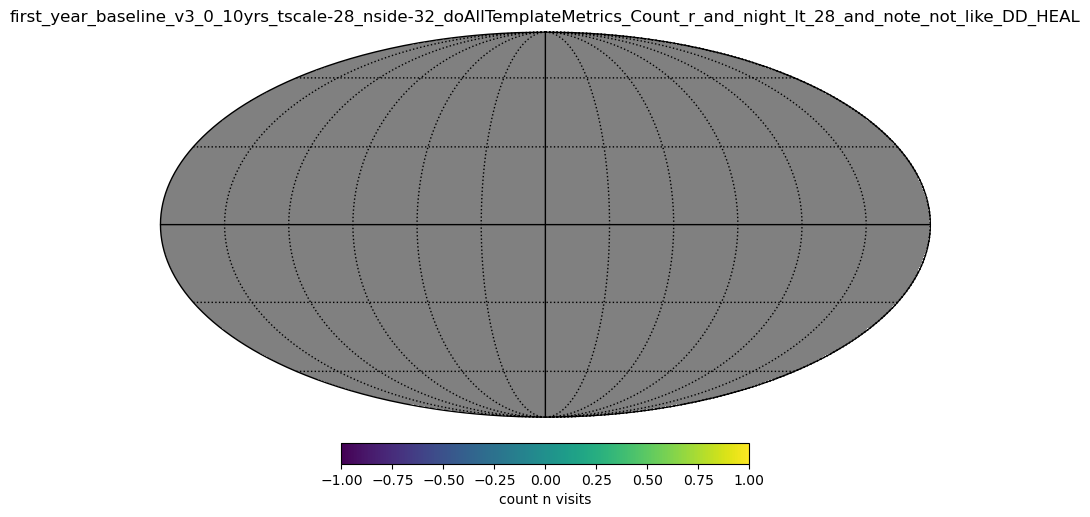

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


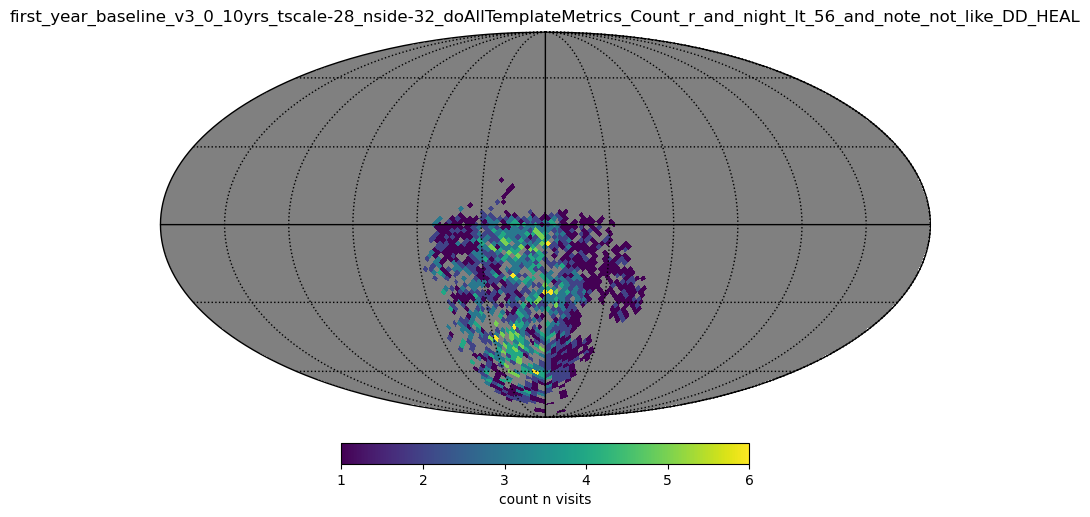

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


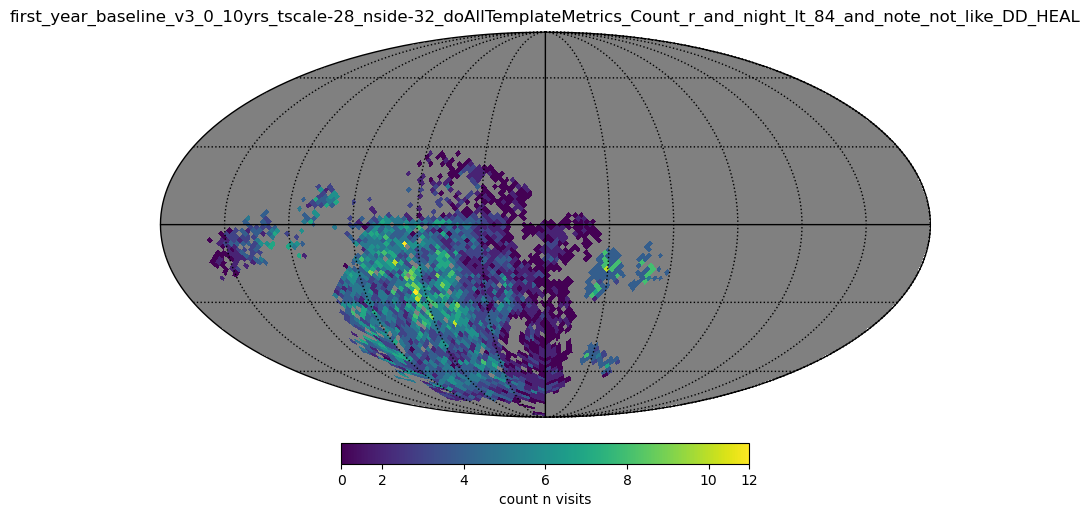

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


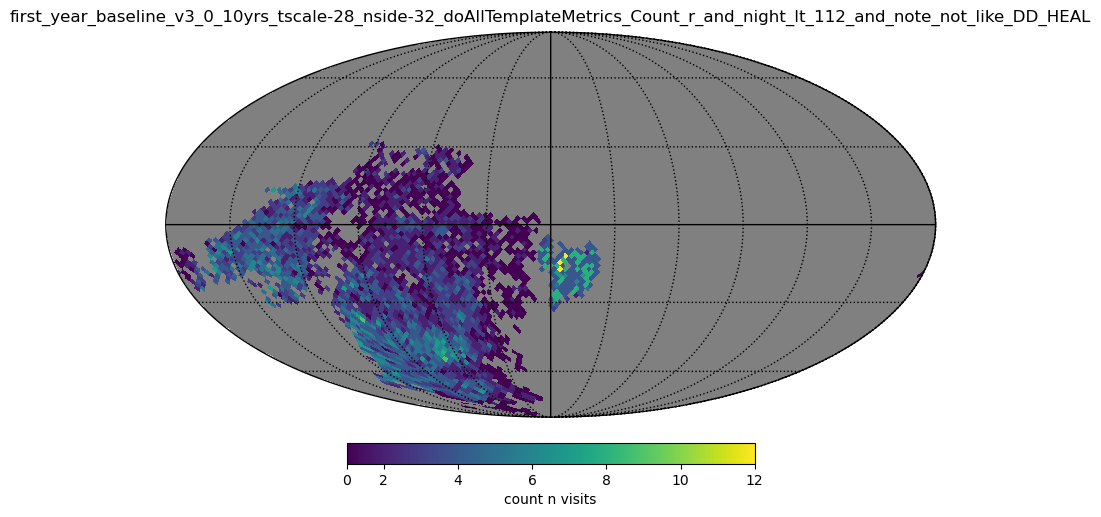

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


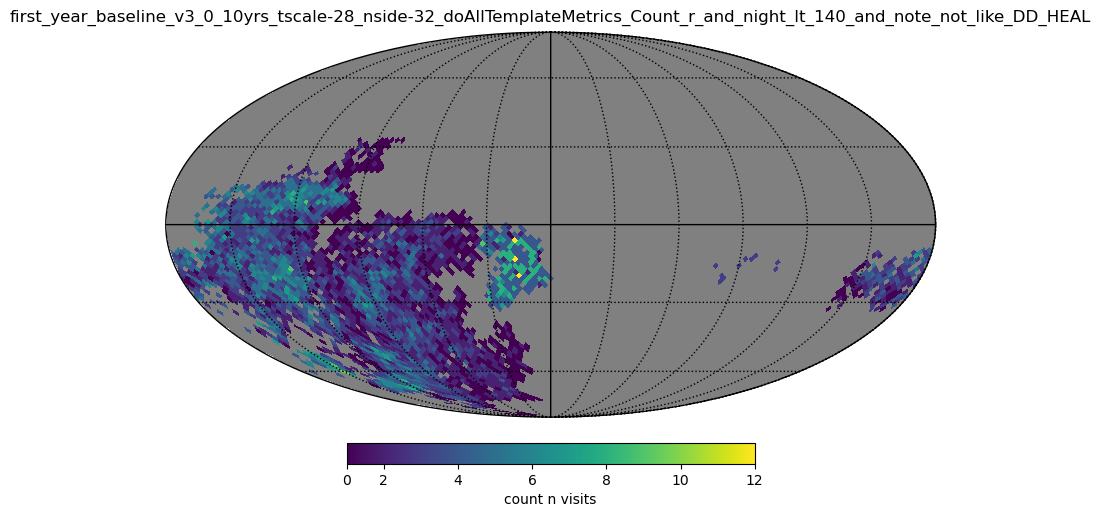

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


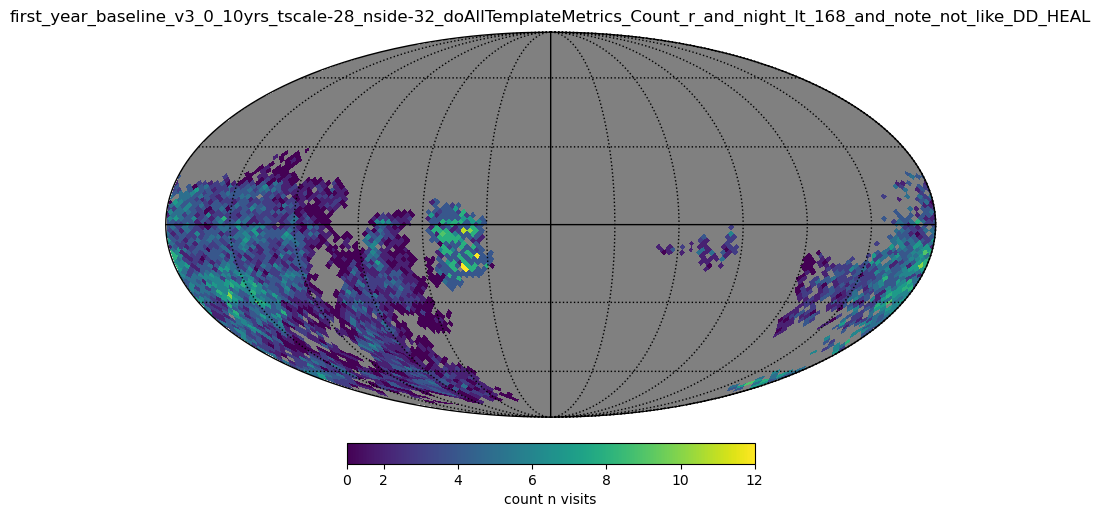

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


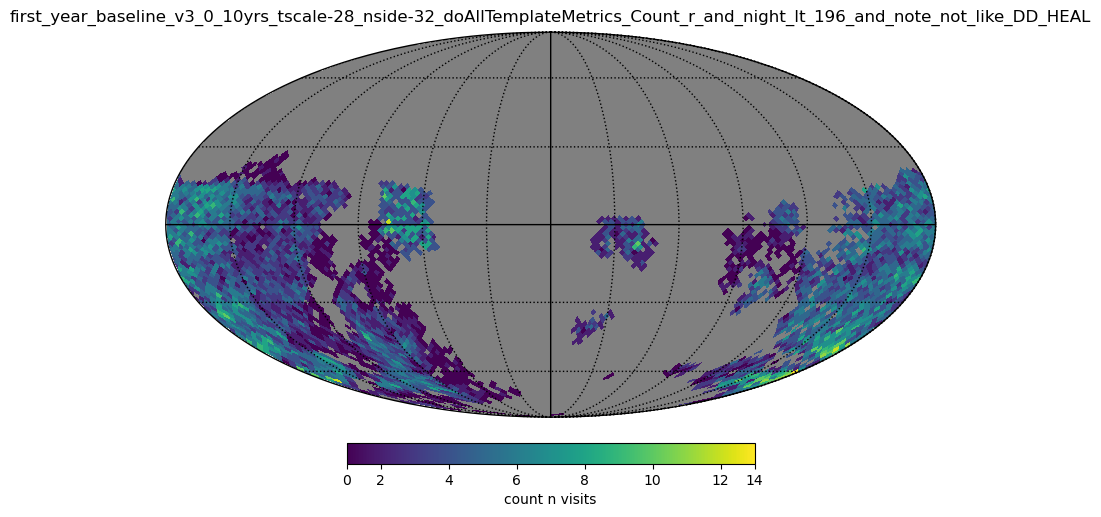

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


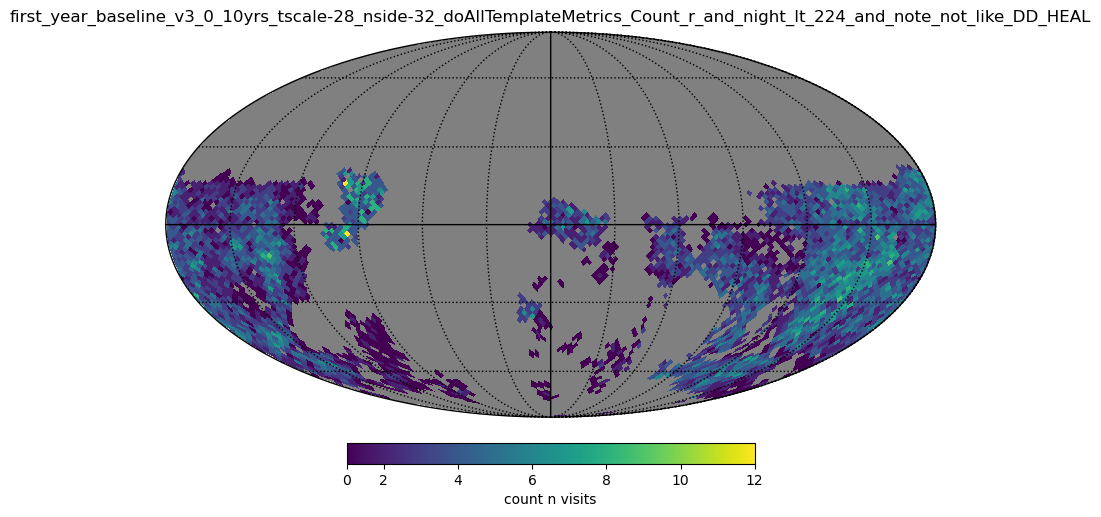

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


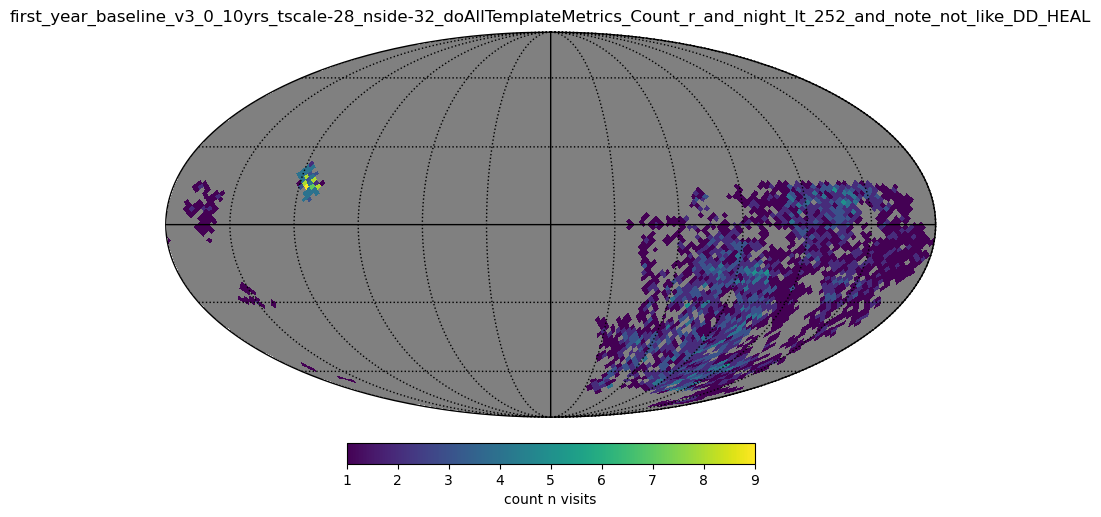

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


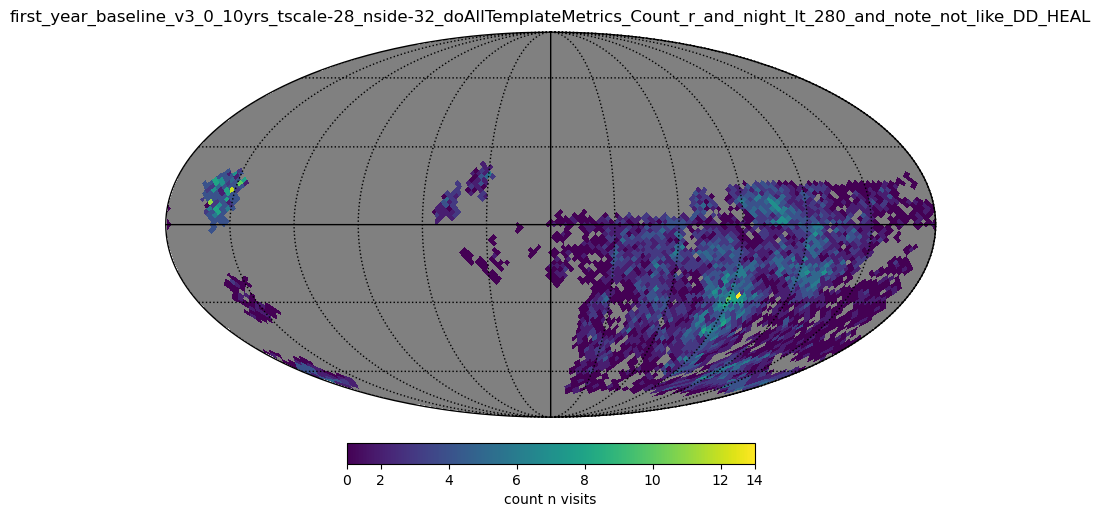

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


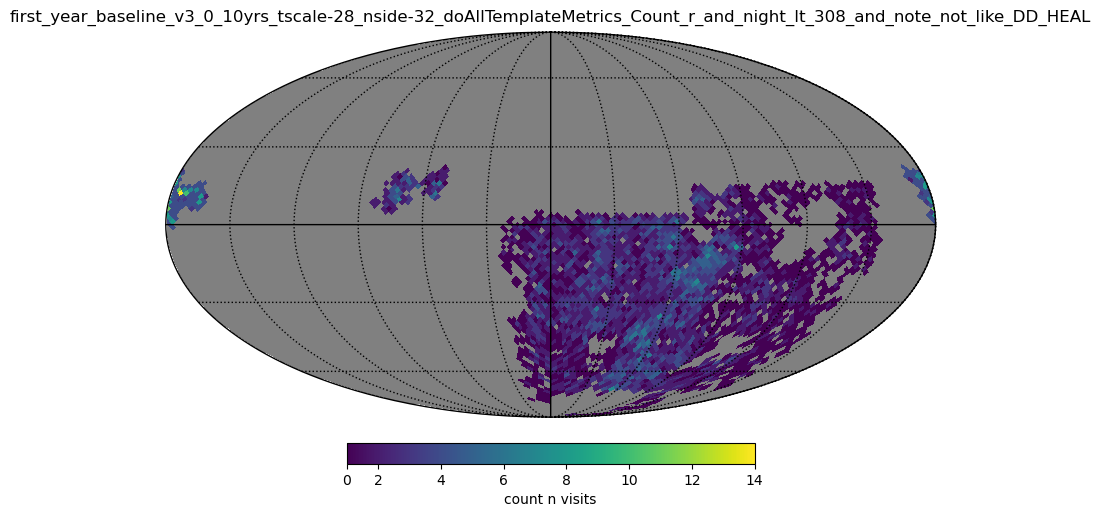

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


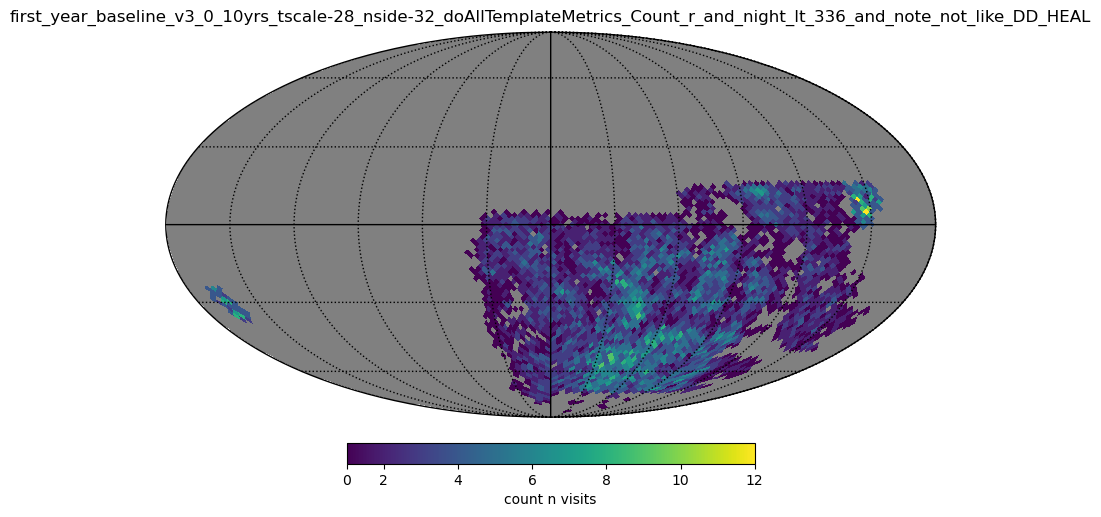

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


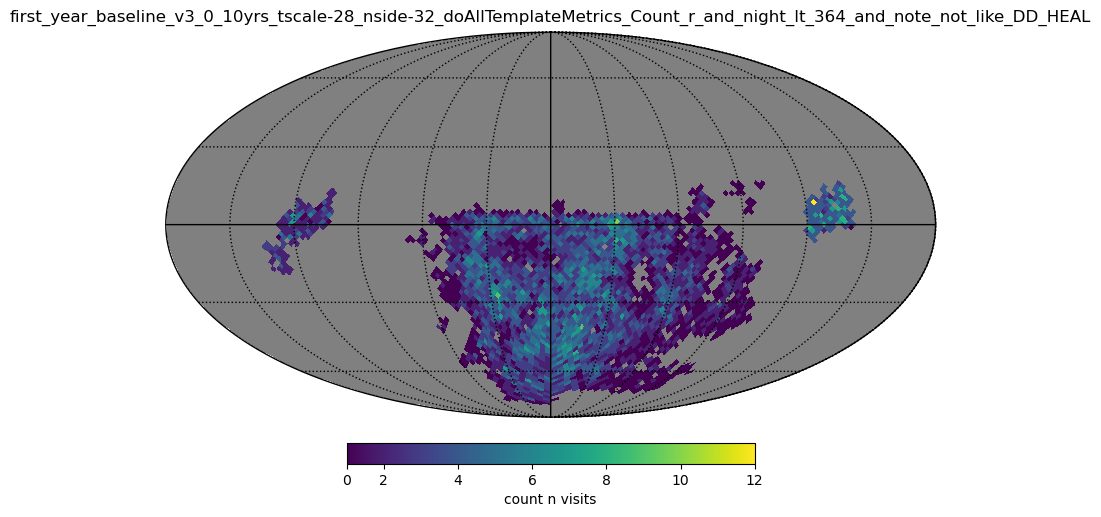

Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes


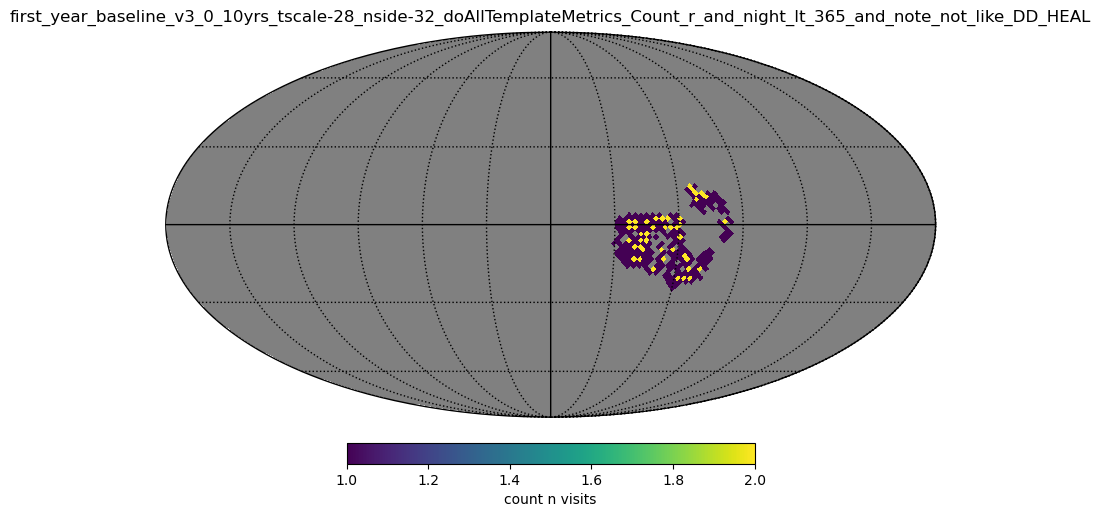

In [41]:
for i in range(len(metric_files)):
    
    # load the metric file
    mb = maf.MetricBundle.load(metric_files[i])
    
    # retrieve data/mask for all the masked arrays
    # each value in data corresponds to the metric value for some slice point
    data = mb.metric_values.data
    mask = mb.metric_values.mask
    metric_vals = np.ma.array(data, mask=mask)

    # replace the masked values with nan
    metric_vals.fill_value = np.nan
    
    #plot the skymap
    x = hp.mollview(metric_vals, title=mb.file_root, 
                    cbar = None)
    hp.graticule()

    # customise the colorbar
    fig = plt.gcf()
    ax = plt.gca()
    image = ax.get_images()[0]
    cbar = fig.colorbar(image, ax=ax, orientation = "horizontal", shrink = 0.5, location = "bottom",
                       pad = 0.05)
    cbar.set_label("count n visits")

#     fname = "{}/{}.png".format(savefig_path,mb.file_root)
#     plt.savefig(fname, facecolor="w", transparent=True, bbox_inches="tight")

    plt.show()

In [44]:
len(metric_files)

14

1
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... -- -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_28_and_note_not_like_DD_HEAL


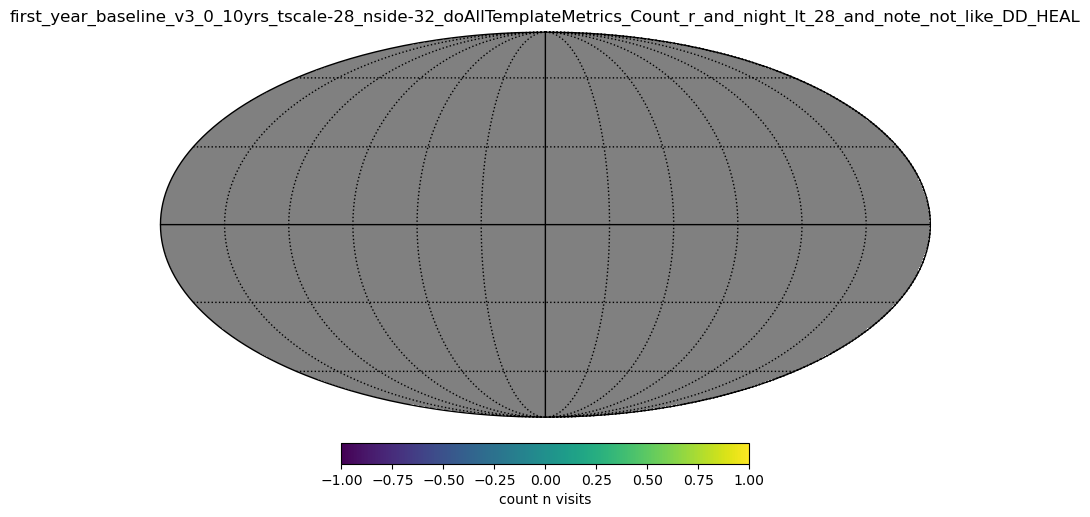

2
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... -- -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_56_and_note_not_like_DD_HEAL


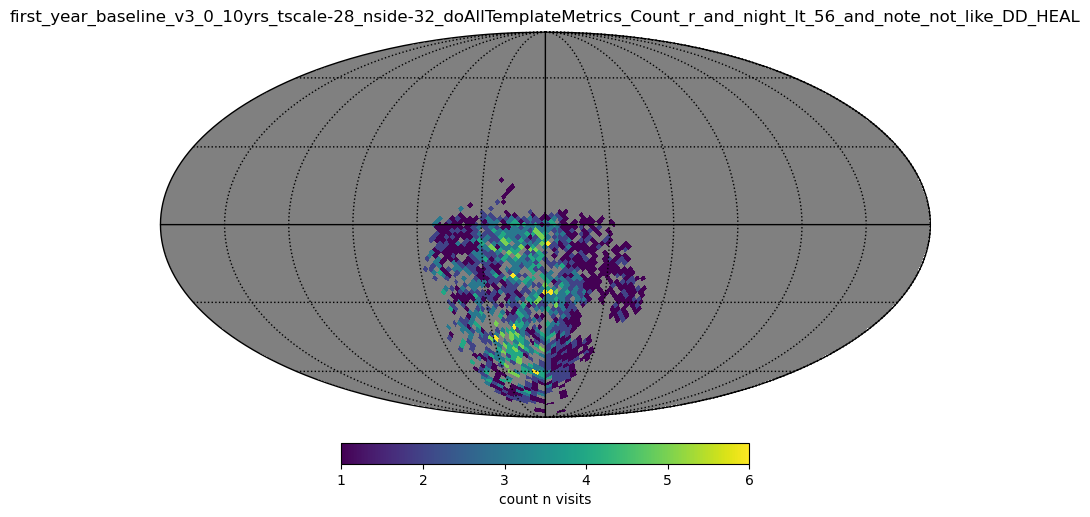

3
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... -- -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_84_and_note_not_like_DD_HEAL


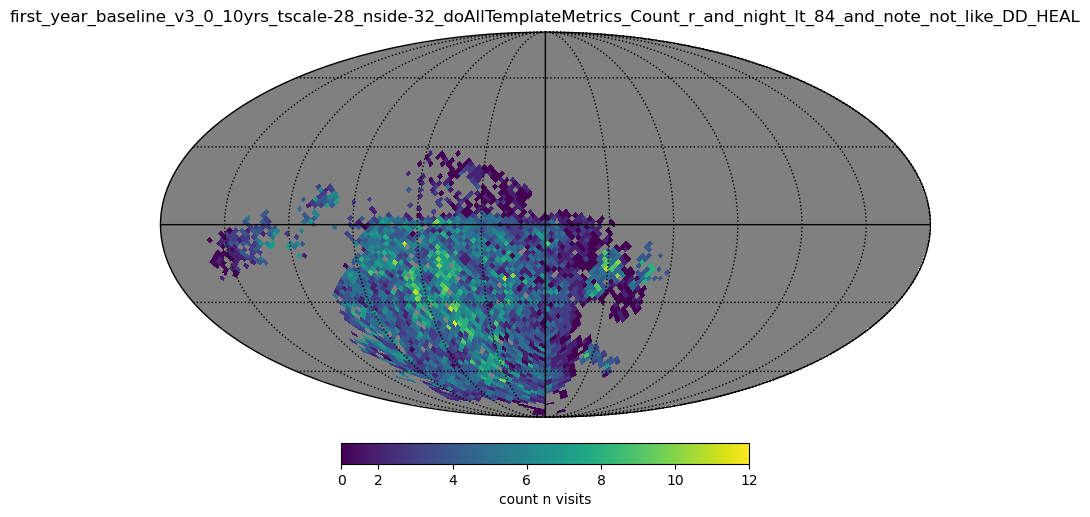

4
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... -- -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_112_and_note_not_like_DD_HEAL


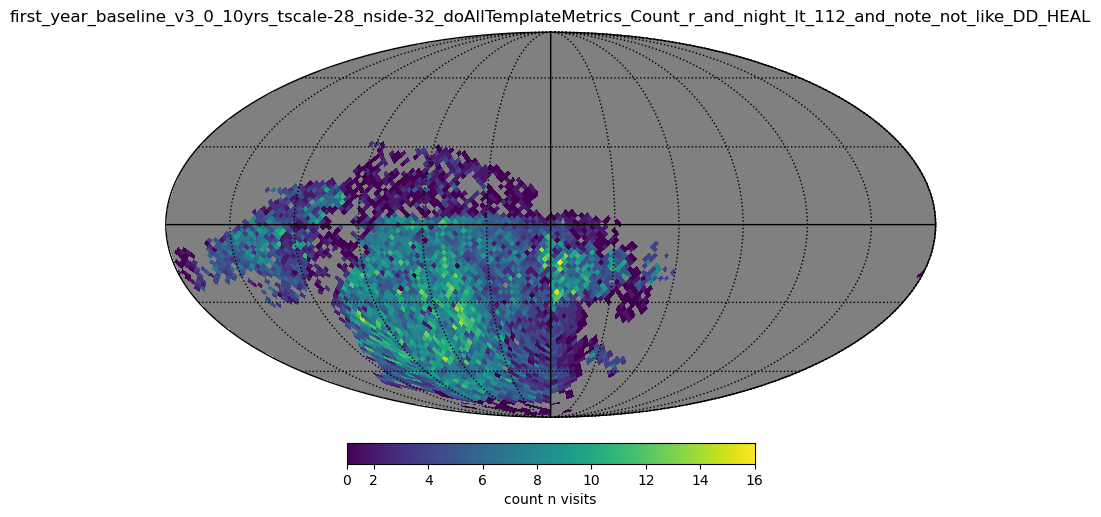

5
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... -- -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_140_and_note_not_like_DD_HEAL


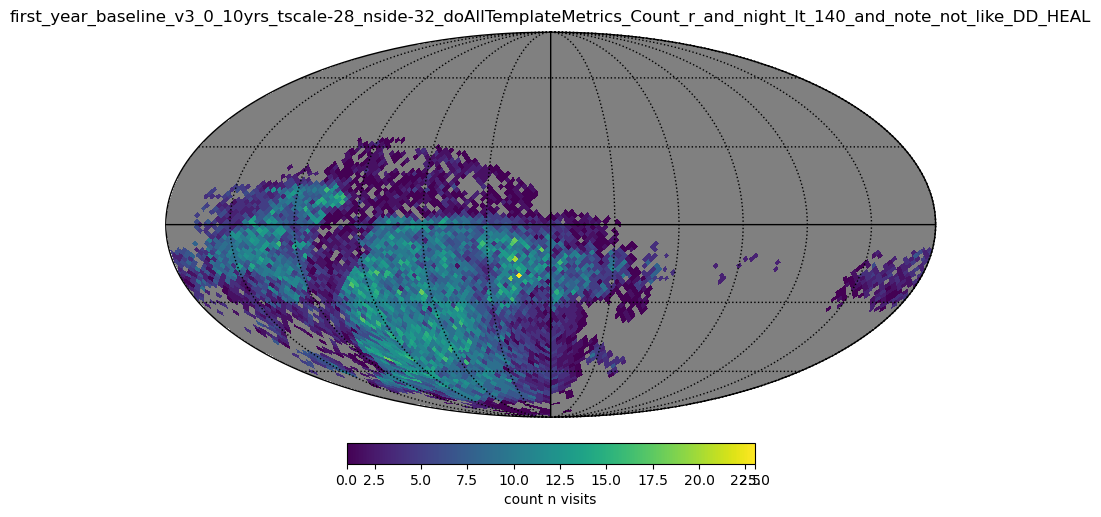

6
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... -- -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_168_and_note_not_like_DD_HEAL


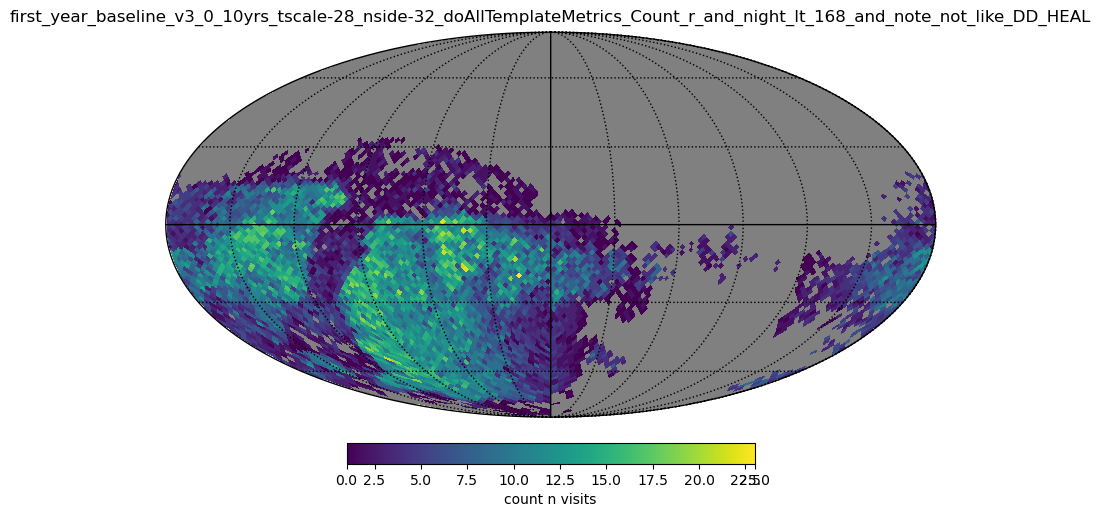

7
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... 1.0 -- --] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_196_and_note_not_like_DD_HEAL


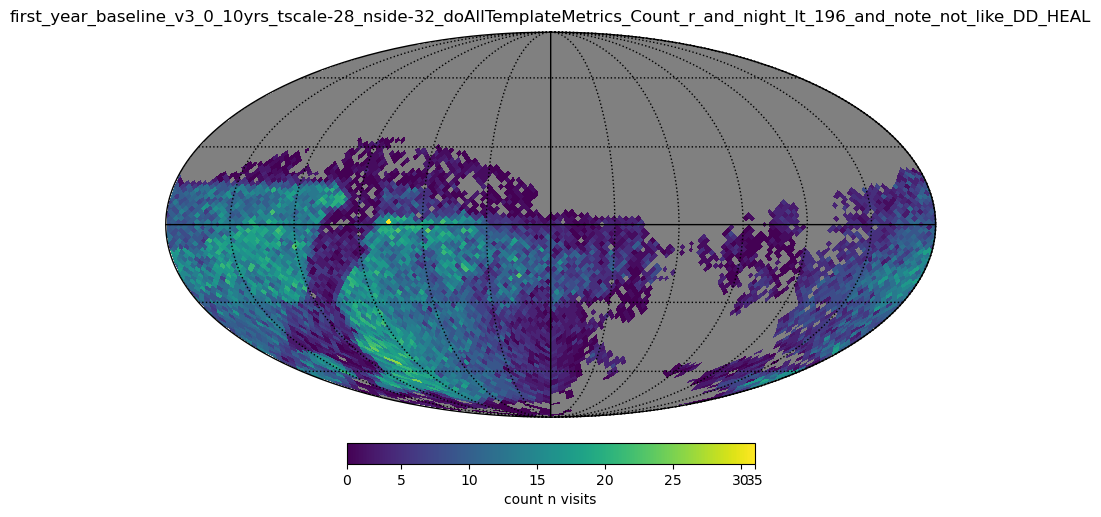

8
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... 1.0 -- 2.0] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_224_and_note_not_like_DD_HEAL


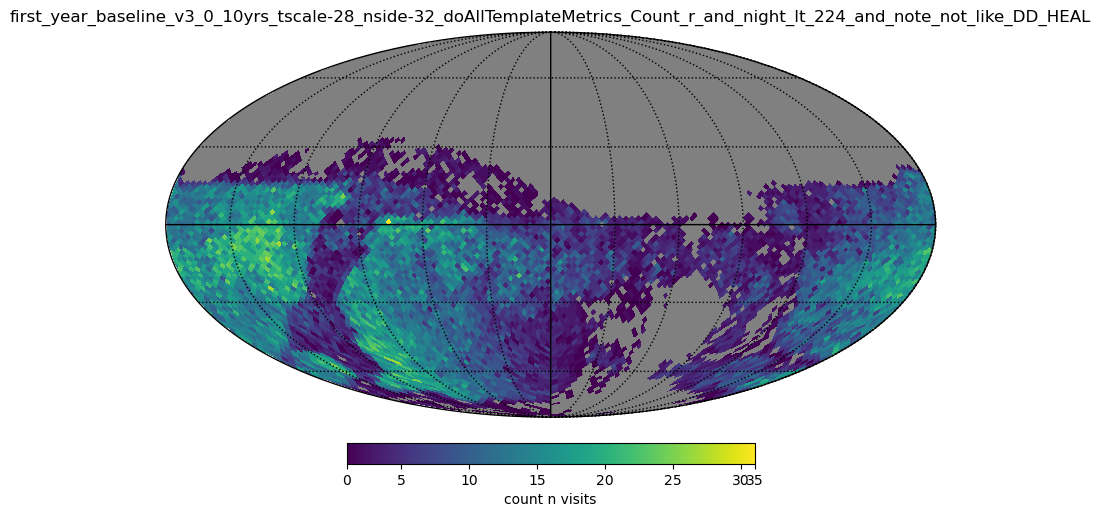

9
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... 1.0 -- 2.0] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_252_and_note_not_like_DD_HEAL


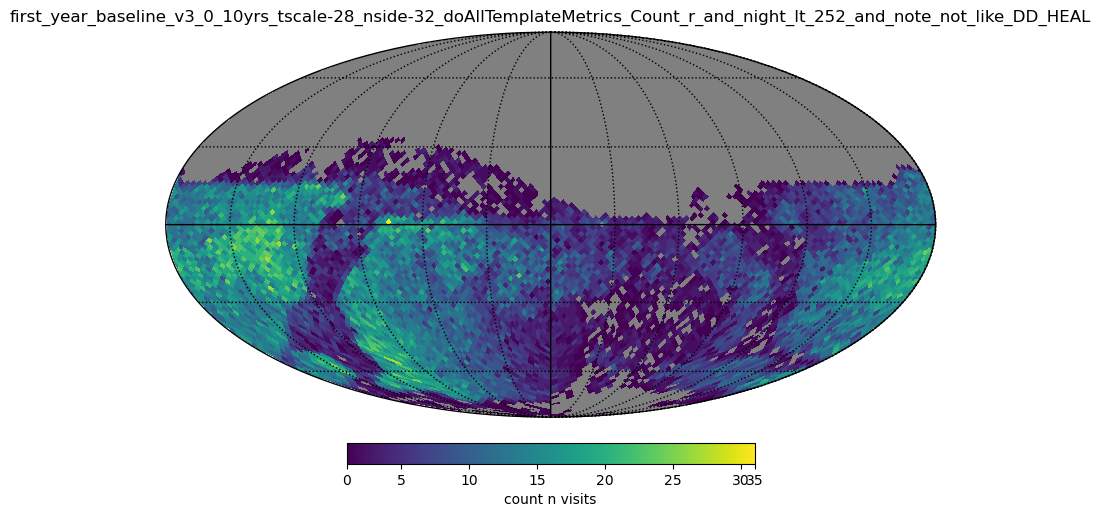

10
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... 1.0 -- 2.0] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_280_and_note_not_like_DD_HEAL


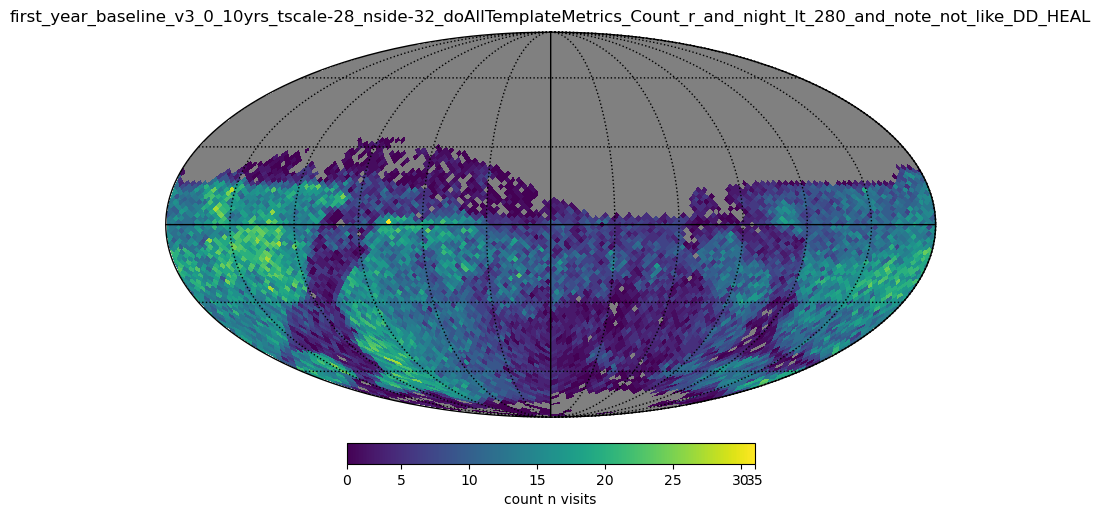

11
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... 1.0 -- 2.0] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doAllTemplateMetrics_Count_r_and_night_lt_308_and_note_not_like_DD_HEAL


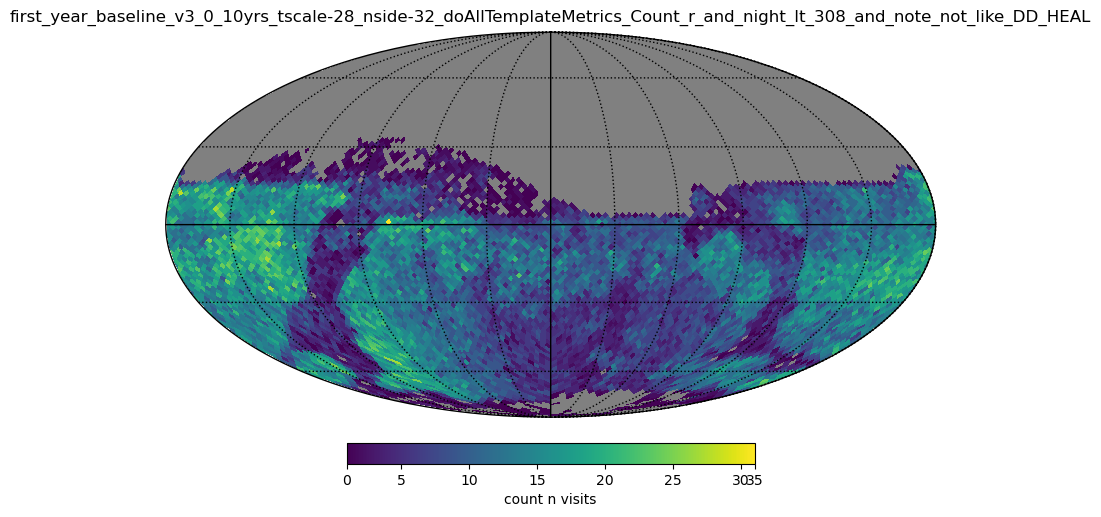

12
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- -- ... 1.0 -- 2.0] 12288
first_year_baseline_v3_0_10yrs_tscale-28_nside-32_doA

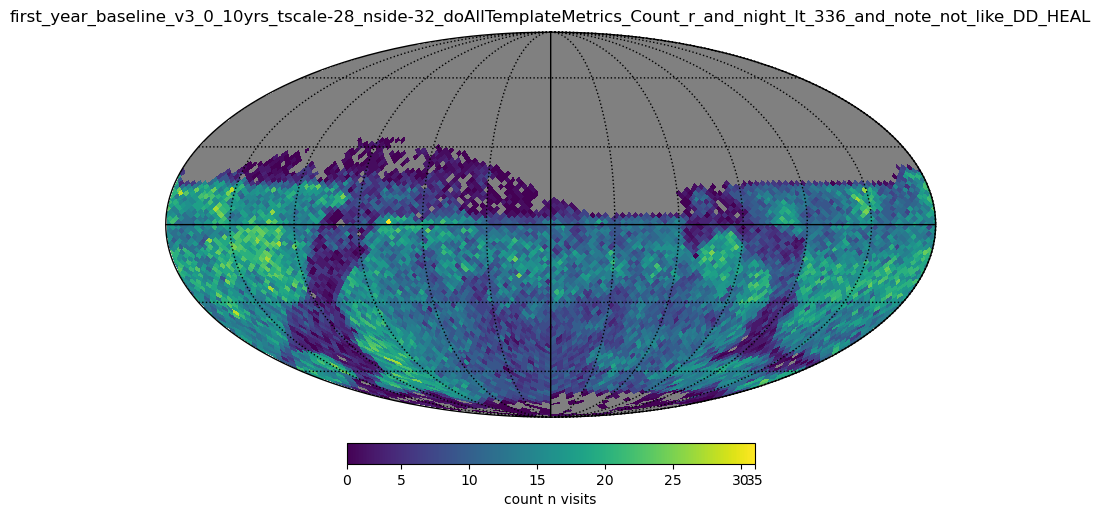

13
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
[-- -- --

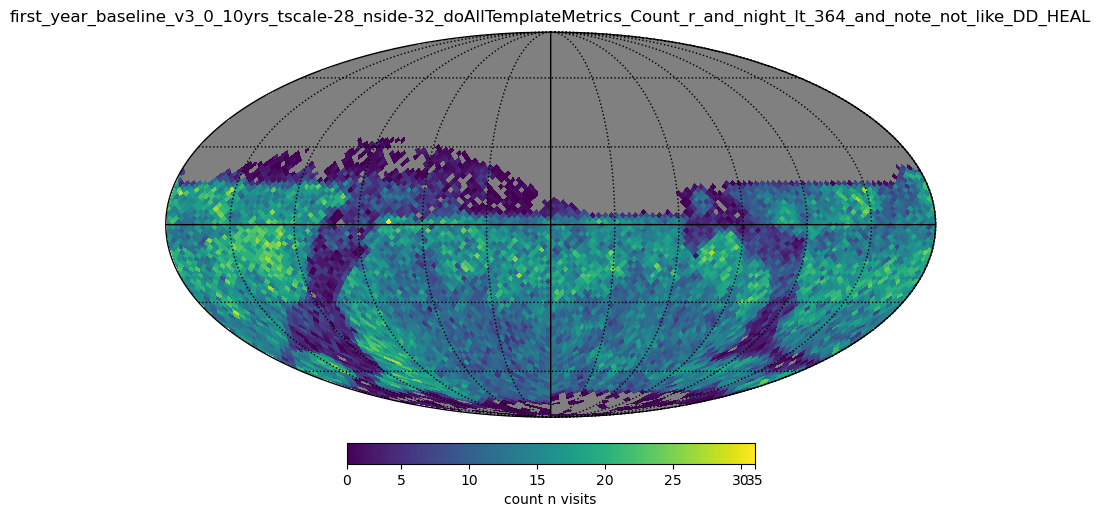

14
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix slicer using NSIDE=32, approximate resolution 109.935565 arcminutes
Healpix s

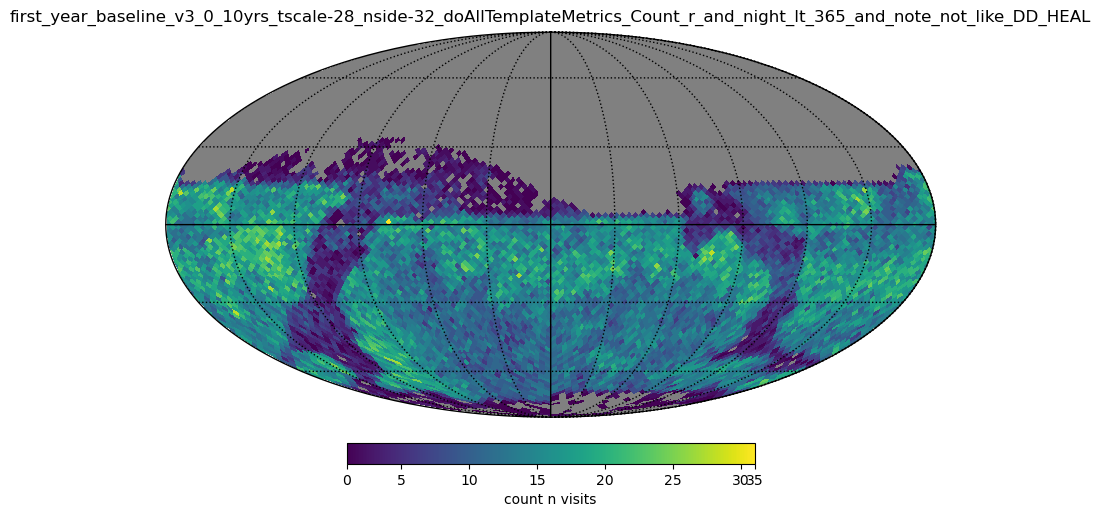

In [51]:
for i in range(len(metric_files)):

    cum_met_files = metric_files[:i+1]
    print(len(cum_met_files))
    
    # combine all metric files up to this point
    
    # load all these metric files
    metric_bundle = []
    for x in cum_met_files:
        metric_bundle.append(maf.MetricBundle.load(x))

    # retrieve data/mask for all the masked arrays
    # each value in data corresponds to the metric value for some slice point
    data = [mb.metric_values.data for mb in metric_bundle]
    mask = [mb.metric_values.mask for mb in metric_bundle]
    metric_data = np.ma.array(data, mask=mask)

    # find the sum of all constituent metrics
    metric_vals = metric_data.sum(axis=0)

    print(metric_vals,len(metric_vals))

    # replace the masked values with nan
    metric_vals.fill_value = np.nan
    
    metric_fname = metric_bundle[-1].file_root
    print(metric_fname)
    
    #plot the skymap
    x = hp.mollview(metric_vals, title=metric_fname, 
                    cbar = None)
    hp.graticule()

    # customise the colorbar
    fig = plt.gcf()
    ax = plt.gca()
    image = ax.get_images()[0]
    cbar = fig.colorbar(image, ax=ax, orientation = "horizontal", shrink = 0.5, location = "bottom",
                       pad = 0.05)
    cbar.set_label("count n visits")

    fname = "{}/{}.png".format(savefig_path,metric_fname)
    plt.savefig(fname, facecolor="w", transparent=True, bbox_inches="tight")

    plt.show()